# Importing Packages

In [61]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV ,StratifiedKFold , cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic.csv")

# DataSet OverView

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

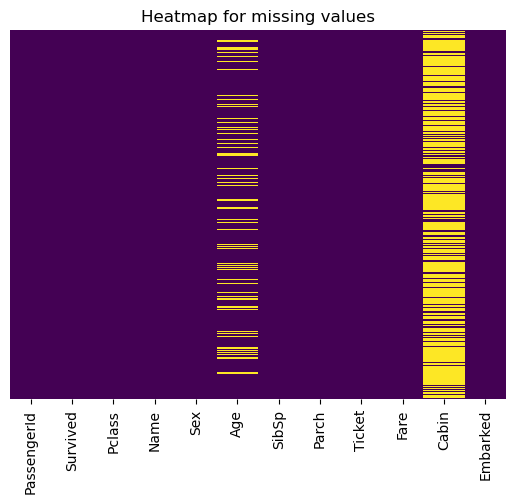

In [8]:
sns.heatmap(df.isnull(),cbar=False , cmap="viridis" , yticklabels= False)
plt.title("Heatmap for missing values")
plt.show()

In [9]:
df.duplicated().sum()

0

In [10]:
df["PassengerId"].nunique()

891

In [11]:
df.drop("PassengerId",inplace=True,axis=1)

In [12]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# Univariate Analysis

In [13]:
df["Pclass"] = df["Pclass"].astype(object)
df["SibSp"] = df["SibSp"].astype(object)
df["Parch"] = df["Parch"].astype(object)

In [14]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [15]:
Skew_kurt_col = df[["Age","Fare"]]
skeweness_val = Skew_kurt_col.apply(lambda x : x.skew())
Kurtosis_val = Skew_kurt_col.apply(lambda x : x.kurtosis())
pd.DataFrame({"skeweness_val":skeweness_val,"Kurtosis_val":Kurtosis_val})

,skeweness_val,Kurtosis_val
Age,0.389108,0.178274
Fare,4.787317,33.398141


In [16]:
df.describe(include="object")

,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,3,891,2,7,7,681,147,3
top,3,"Braund, Mr. Owen Harris",male,0,0,347082,B96 B98,S
freq,491,1,577,608,678,7,4,644


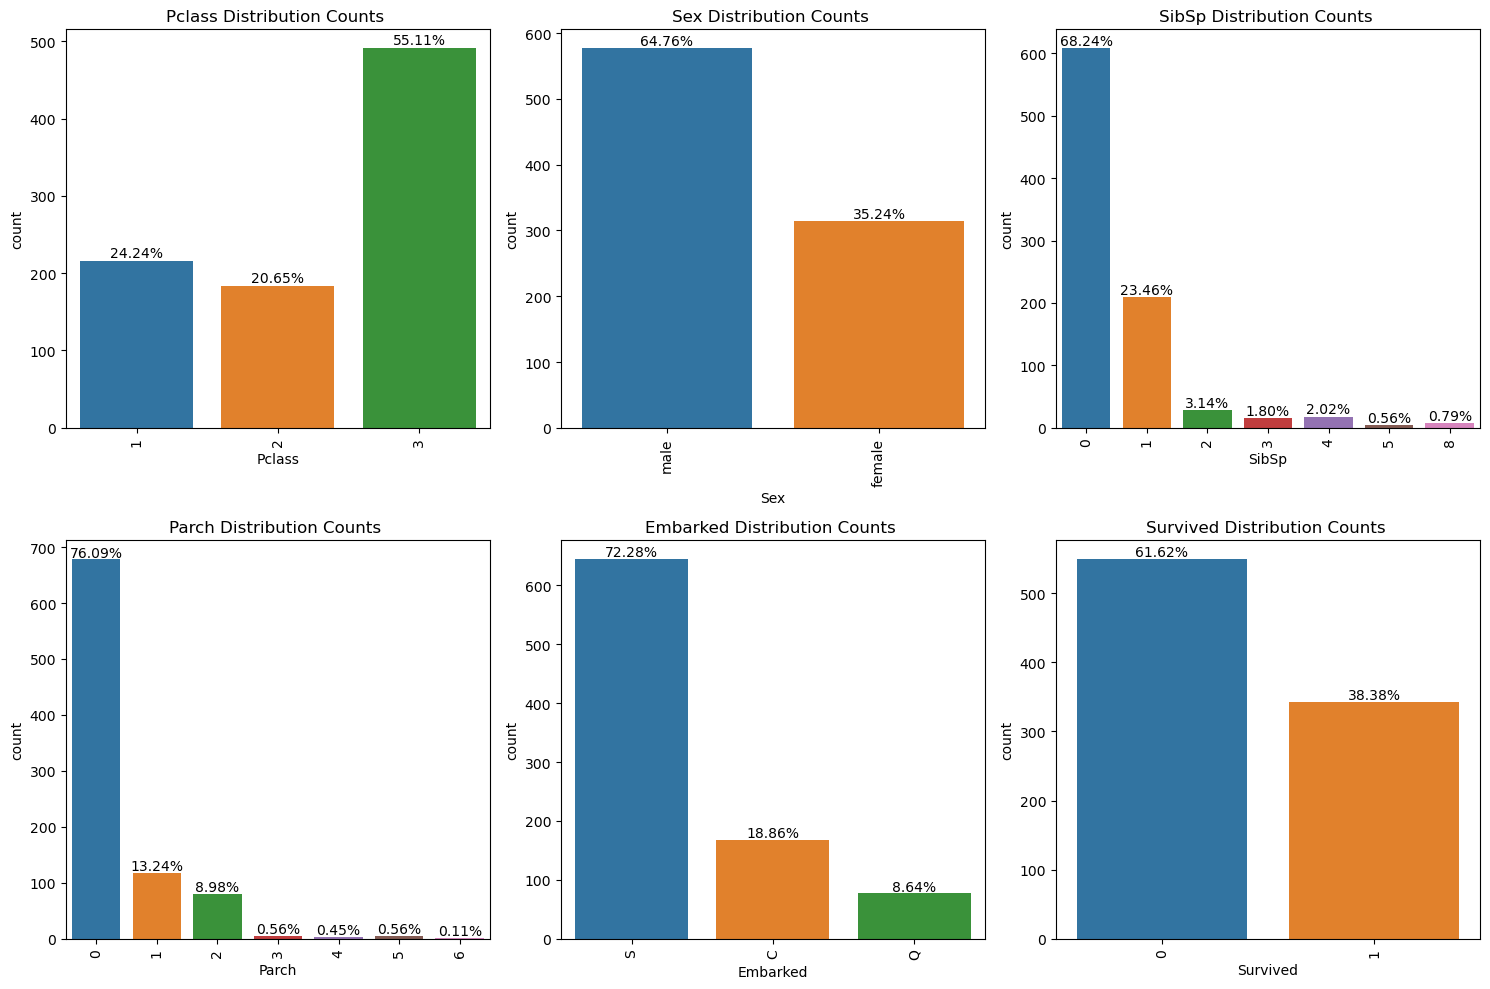

In [17]:
Cat_Features = ["Pclass","Sex","SibSp","Parch","Embarked","Survived"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(Cat_Features):
    ax = sns.countplot(x=df[col], ax=axes[i])
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., h + 5, "{:1.2f}%".format(h / float(df.shape[0]) * 100), ha="center")
    ax.set_title(f"{col } Distribution Counts ")
    ax.tick_params(axis = "x", labelrotation=90)
plt.tight_layout()
plt.show()

In [18]:
def dist_box_viol(data) :
    f , ax = plt.subplots(1,3,figsize = (10,5))
    sns.histplot(x = data,kde=True,ax=ax[0])
    sns.boxplot(x = data,ax=ax[1])
    sns.violinplot(x = data,ax=ax[2])

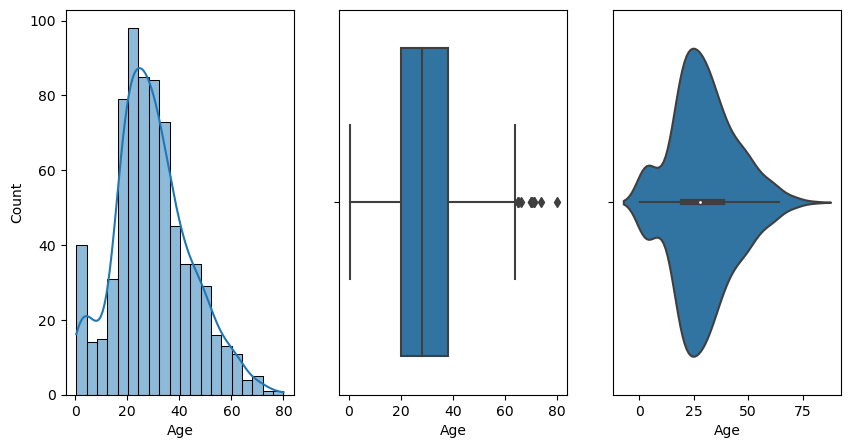

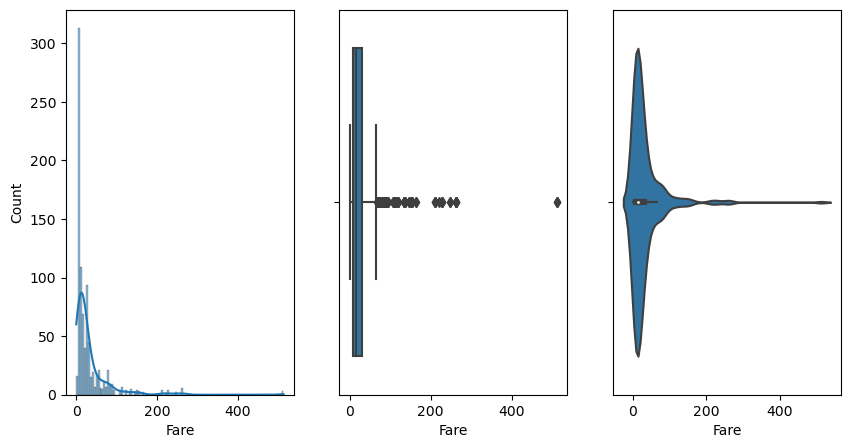

In [19]:
for col in Skew_kurt_col :
    dist_box_viol(df[col])

In [20]:
df[df["Fare"]>400]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


# Data Cleaning

In [21]:
df.drop("Cabin",axis=1,inplace=True)

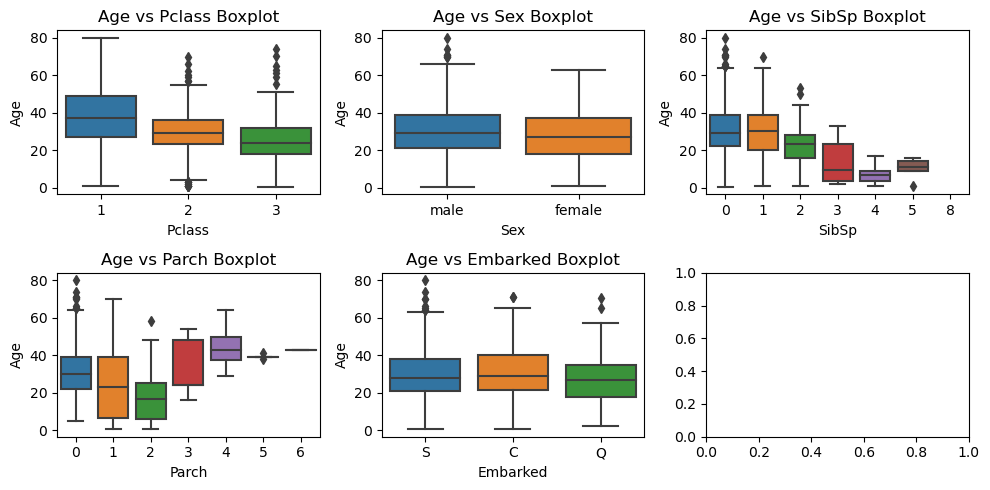

In [22]:
age_with_catFeature = ["Pclass","Sex","SibSp","Parch","Embarked"]
f , axes = plt.subplots(2,3,figsize=(10,5))
axes = axes.flatten()
for i , col in enumerate(age_with_catFeature) :
    ax = sns.boxplot(x=df[col],y=df["Age"],ax=axes[i])
    ax.set_title(f"Age vs {col} Boxplot")
plt.tight_layout()
plt.show()

In [23]:
impute_age_mean = df.groupby(["Pclass"])["Age"].transform("mean").round()
df["Age"] = df["Age"].fillna(impute_age_mean)

In [24]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
def impute_age(row):
    impute_age = df.groupby(["Pclass", "Sex"])["Age"].mean().round(0).to_dict()
    pclass = row["Pclass"]
    sex = row["Sex"]
    
    # Check if age is missing
    if pd.isnull(row["Age"]):
        return impute_age.get((pclass, sex), row["Age"])
    else:
        return row["Age"]

# Apply the imputation function to fill missing ages
df["Age"] = df.apply(impute_age, axis=1)

In [26]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [27]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Feature Engineering

In [28]:
def title_extractor(name_series):
    '''
    This function extracts titles from a Series containing names of people
    '''
    return name_series.str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
df['Title'] = title_extractor(df['Name'])
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [30]:
other_idx = df[~df.Title.isin(['Mr','Miss','Mrs','Master'])].index
df.loc[other_idx,'Title'] = 'other'

In [31]:
df["Survived"].groupby(df["Title"]).mean().sort_values(ascending= False)

Title
Mrs       0.792000
Miss      0.697802
Master    0.575000
other     0.444444
Mr        0.156673
Name: Survived, dtype: float64

In [32]:
df["Family"] = df["SibSp"] + df["Parch"]

In [33]:
df["Family"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [34]:
df.loc[df[df["Family"]==0].index,"Family"] = "Alone"
df.loc[df[df["Family"].isin([1,2,3])].index,"Family"] = "Small"
df.loc[df[df["Family"].isin([4,5])].index,"Family"] = "Medium"
df.loc[df[df["Family"].isin([6,10,7])].index,"Family"] = "Large"

In [35]:
df.drop(["Name","SibSp","Parch"],axis=1,inplace=True)

In [36]:
df["Ticket"].nunique()

681

In [37]:
df.drop('Ticket', axis=1, inplace=True)


# Bivariate Analysis

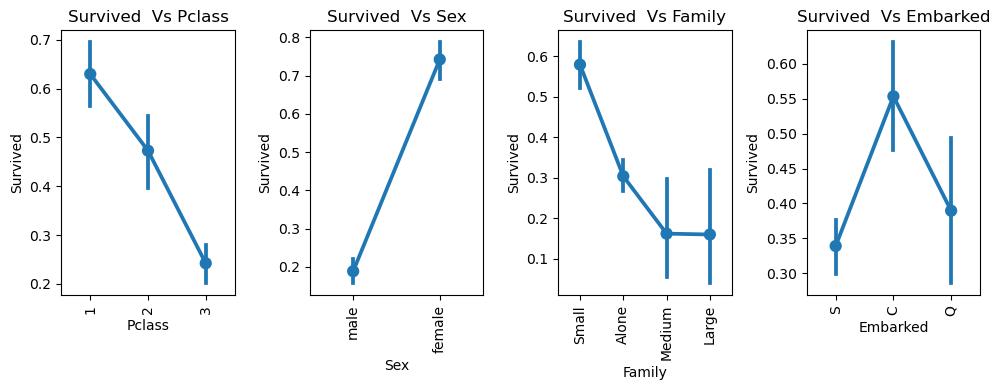

In [38]:
Cat_Features = ["Pclass","Sex","Family","Embarked"]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,4))
axes = axes.flatten()
for i, col in enumerate(Cat_Features):
        ax = sns.pointplot(x=df[col],y=df["Survived"], ax=axes[i])
        ax.set_title(f"Survived  Vs {col}")
        ax.tick_params(axis="x", rotation=90)
plt.tight_layout()
plt.show()

In [39]:
for col in Cat_Features :
    print(df["Survived"].groupby(df[col]).mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Family
Alone     0.303538
Large     0.160000
Medium    0.162162
Small     0.578767
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [40]:
def chi_squared_test(col) :
    c_t =pd.crosstab(df[col],df["Survived"])
    stats , pval , dof , expected_val = chi2_contingency(c_t)
    print(c_t)
    print("Stats : ",stats)
    print("Pval : ",pval)
    print("DOF : ",dof)
    print("Expected Values : ",expected_val)
    if pval < 0.05 :
        print(f"We have sufficient evidence to conclude that there is relation between {col} and Survival Rate .")
    else :
        print(f"We have ((Insufficient)) evidence to conclude that there is relation between {col} and Survival Rate .")
    print(60*"--")

In [41]:
for col in Cat_Features :
    chi_squared_test(col)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Stats :  102.88898875696056
Pval :  4.549251711298793e-23
DOF :  2
Expected Values :  [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
We have sufficient evidence to conclude that there is relation between Pclass and Survival Rate .
------------------------------------------------------------------------------------------------------------------------
Survived    0    1
Sex               
female     81  233
male      468  109
Stats :  260.71702016732104
Pval :  1.1973570627755645e-58
DOF :  1
Expected Values :  [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]
We have sufficient evidence to conclude that there is relation between Sex and Survival Rate .
------------------------------------------------------------------------------------------------------------------------
Survived    0    1
Family            
Alone     374  163
Large      21    

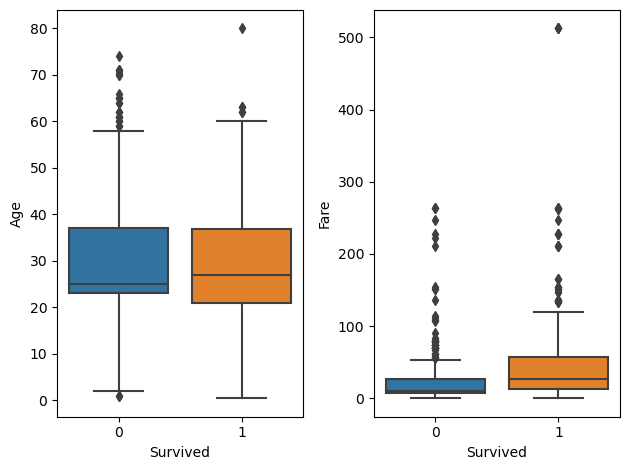

In [42]:
f,axes =plt.subplots(nrows=1 , ncols=2 )
axes = axes.flatten()
for i , col in enumerate(Skew_kurt_col) :
    sns.boxplot(x=df["Survived"],y=df[col],ax=axes[i])
plt.tight_layout()

In [43]:
for col in Skew_kurt_col :
    print(df[col].groupby(df["Survived"]).mean())

Survived
0    29.787796
1    28.425936
Name: Age, dtype: float64
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [44]:
survived = df[df["Survived"]==1]
not_survived = df[df["Survived"]==0]
for col in Skew_kurt_col :
    S1 = survived[col]
    S0 = not_survived[col]
    stats , pval  = ttest_ind(S0,S1,equal_var=False)
    print("Stats : ",stats)
    print("Pval : ",pval)
    if pval < 0.05 :
        print(f"We have sufficient evidence to conclude that there is difference between {col} in the two groups.")
    else :
        print(f"We have ((Insufficient)) evidence to conclude that there is difference between {col} in the two groups.")
    print(60*"--")
        

Stats :  1.4658052860514608
Pval :  0.1431679661441726
We have ((Insufficient)) evidence to conclude that there is difference between Age in the two groups.
------------------------------------------------------------------------------------------------------------------------
Stats :  -6.839099259085254
Pval :  2.6993323503141236e-11
We have sufficient evidence to conclude that there is difference between Fare in the two groups.
------------------------------------------------------------------------------------------------------------------------


# Multivarite Analysis

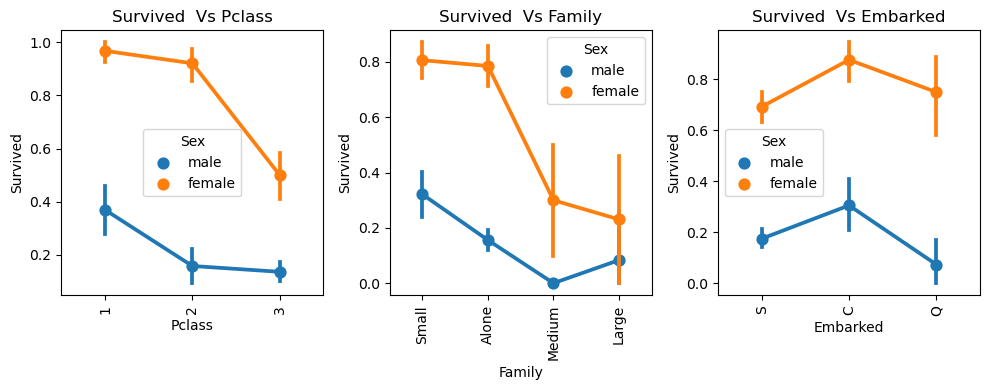

In [45]:
Cat_Features = ["Pclass","Family","Embarked"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
axes = axes.flatten()
for i, col in enumerate(Cat_Features):
        ax = sns.pointplot(x=df[col],y=df["Survived"], hue = df["Sex"] , ax=axes[i])
        ax.set_title(f"Survived  Vs {col}")
        ax.tick_params(axis="x", rotation=90)
plt.tight_layout()
plt.show()

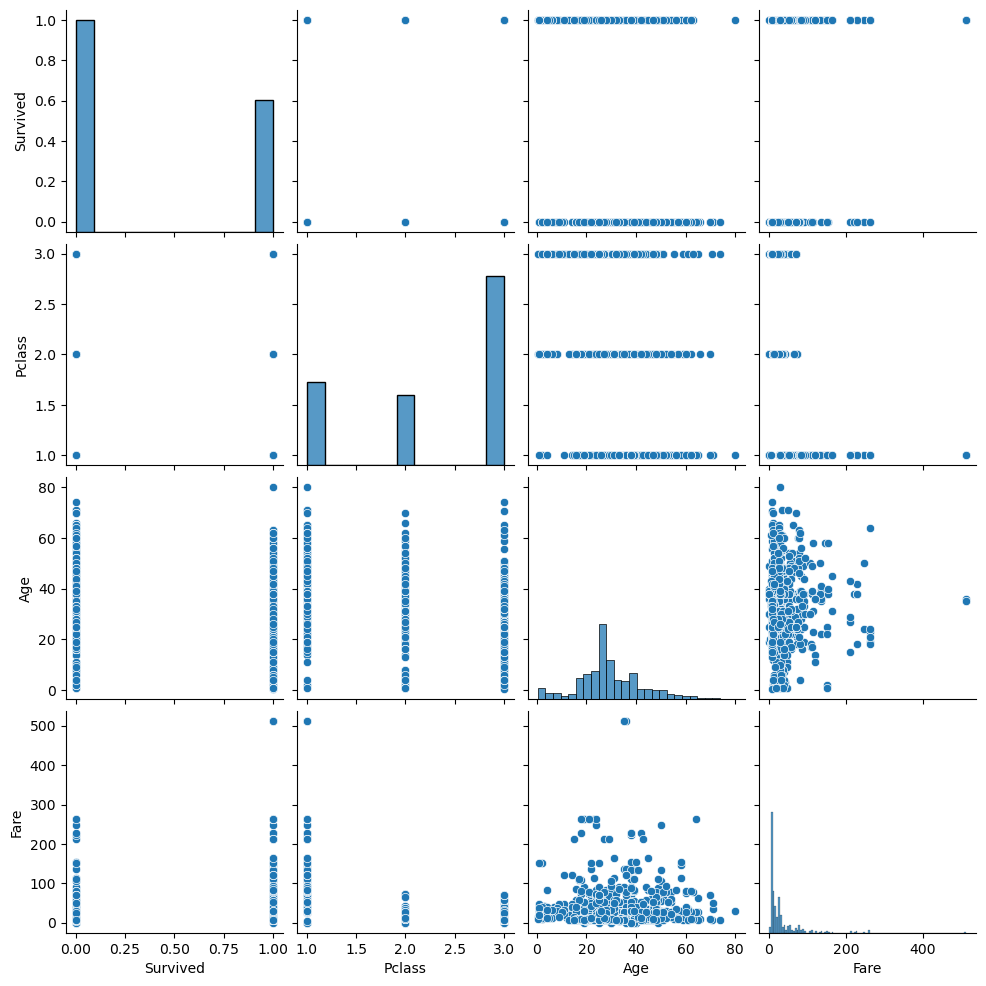

In [46]:
sns.pairplot(df)
plt.show()

In [47]:
le = LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
dummies = pd.get_dummies(df[["Embarked","Title"]])
df = pd.concat([dummies,df],axis=1)
df.drop(["Title","Embarked","Embarked_C","Embarked_Q"],axis=1,inplace=True)
df["Family"] = df["Family"].replace({"Alone":0 , "Small":1,"Medium":2,"Large":3})

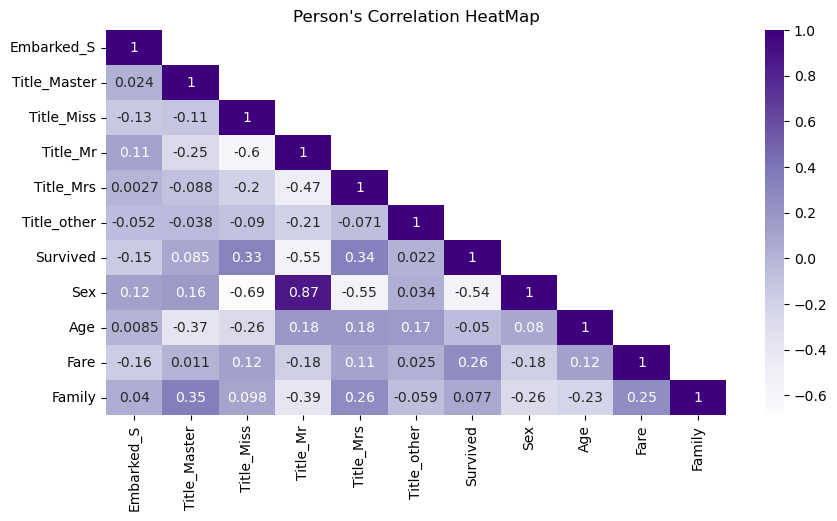

In [48]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask,1)]=True
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="Purples",mask=mask)
plt.title("Person's Correlation HeatMap")
plt.show()

In [49]:
X = df.drop("Survived",axis=1)
Y = df["Survived"]

In [50]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [65]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=10)

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train,Y_train)

C:\Users\talya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = roc_auc_score(Y_test, y_prob)

In [75]:
fpr

array([0.        , 0.12727273, 1.        ])

In [76]:
tpr

array([0.        , 0.73913043, 1.        ])

In [77]:
thresholds

array([2, 1, 0], dtype=int64)

In [78]:
roc_auc

0.8059288537549407

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

In [50]:
def drop_column_importance(model, X_train, y_train, random_state=0):

    importances = []

    model_clone = clone(model)

    model_clone.random_state = random_state

    model_clone.fit(X_train, y_train)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring='accuracy').mean()

    

    for col in X_train.columns:

        model_clone = clone(model)

        model_clone.random_state = random_state

        model_clone.fit(X_train.drop(col, axis = 1), y_train)

        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring='accuracy').mean()

        importances.append(benchmark_score - drop_column_score)
        

    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df 

In [51]:
def drop_column_importance_plot(model, X_train, y_train, random_state=0) :
    df = drop_column_importance(model, X_train, y_train)
    sns.barplot(x=df["feature importance"],y=df['feature'],orient = "h" )
    plt.show()

In [52]:
def hyperparameter_tunning(clf,params_grid,X_train,Y_train) :
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    best_params = None
    best_score = None
    print("Hyperparameters Tunning Starting .... ")
    for i , params in enumerate(params_grid) :
        start= time.time()
        clf_grid = GridSearchCV(clf,params_grid,cv=cv,scoring="accuracy")
        clf_grid.fit(X_train,Y_train)
        stop = time.time()
        print(f"Iteration {i+1} / {len(params_grid)}")
        print(f"Time Taken{stop - start:.2f} Seconds")
        if best_score is None or clf_grid.best_score_ > best_score :
            best_score = clf_grid.best_score_
            best_params = clf_grid.best_params_
        print(f"Best Score so Far : {best_score:.4f}")
        print(f"Best Params so Far : {best_params}")
    print("End Of Hyperparameters Tunning")
    return best_params
